In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
plt.style.use('ggplot')
pd.set_option('display.max_columns', 0)
pd.set_option('display.max_rows', 500)


In [58]:
df = pd.read_csv('/content/loan.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [59]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-

In [60]:
total= df.isnull().sum().sort_values(ascending=False)
percent= (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
missing_data= pd.concat([total, percent],axis=1, keys=["Total", "Percent"])
missing_data.head(25)

,Total,Percent
verification_status_joint,39717,100.0
annual_inc_joint,39717,100.0
mo_sin_old_rev_tl_op,39717,100.0
mo_sin_old_il_acct,39717,100.0
bc_util,39717,100.0
bc_open_to_buy,39717,100.0
avg_cur_bal,39717,100.0
acc_open_past_24mths,39717,100.0
inq_last_12m,39717,100.0
total_cu_tl,39717,100.0


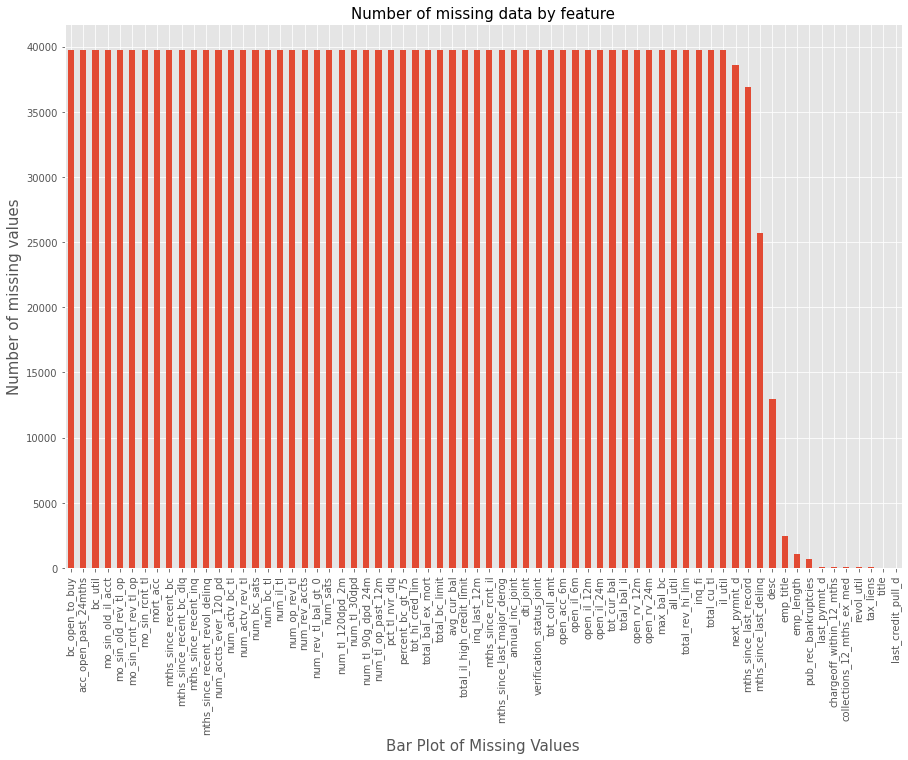

In [61]:
plt.figure(figsize=(15,10))
missing= df.isnull().sum()
missing= missing[missing > 0]
missing.sort_values(ascending= False, inplace=True)
plt.xlabel("Bar Plot of Missing Values", fontsize=15)
plt.ylabel("Number of missing values", fontsize=15)
plt.title("Number of missing data by feature", fontsize=15)
missing.plot(kind="bar")

plt.show()

In [62]:
# Any variable having missing values more than 50 percent are removed
df.drop(["dti_joint", "verification_status_joint", "annual_inc_joint", "il_util", "mths_since_rcnt_il",
            "all_util", "max_bal_bc", "open_rv_24m", "open_rv_12m", "total_cu_tl", "total_bal_il", "open_il_24m",
            "open_il_12m", "total_cu_tl", "total_bal_il", "open_il_24m", "open_il_12m", "open_il_6m", "open_acc_6m",
            "inq_fi", "inq_last_12m", "desc", "mths_since_last_record", "mths_since_last_major_derog",
            "mths_since_last_delinq", "next_pymnt_d", "total_rev_hi_lim", "tot_cur_bal", "tot_coll_amt"], axis=1,
           inplace=True)

# Delete unwanted columns
df.drop(["id", "url", "member_id"], axis=1, inplace=True)

# Payment plan has all the values "n" and only 3 values "y" so it is not important
df.drop(["pymnt_plan"], axis=1, inplace=True)

# Since we have both address state and zip code let's drop zip code and use address state only
df.drop(["zip_code"], axis=1, inplace=True)

# Title is not important instead we will use "purpose" variable
df.drop(["title"], axis=1, inplace=True)

# The grade is implied by the subgrade, so let's drop the grade column.
df.drop(["grade"], axis=1, inplace=True)

In [63]:
# remove "months" from "36 months" and convert it to int type
df["term"]= df['term'].map(lambda x: x.rstrip('months'))
df["term"]= df["term"].astype("int")

In [64]:
total= df.isnull().sum().sort_values(ascending=False)
percent= (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
missing_data= pd.concat([total, percent],axis=1, keys=["Total", "Percent"])
missing_data.head(15)

,Total,Percent
total_il_high_credit_limit,39717,100.0
num_il_tl,39717,100.0
avg_cur_bal,39717,100.0
num_actv_rev_tl,39717,100.0
num_actv_bc_tl,39717,100.0
num_accts_ever_120_pd,39717,100.0
mths_since_recent_revol_delinq,39717,100.0
mths_since_recent_inq,39717,100.0
mths_since_recent_bc_dlq,39717,100.0
mths_since_recent_bc,39717,100.0


Text(0, 0.5, 'Loan Amount')

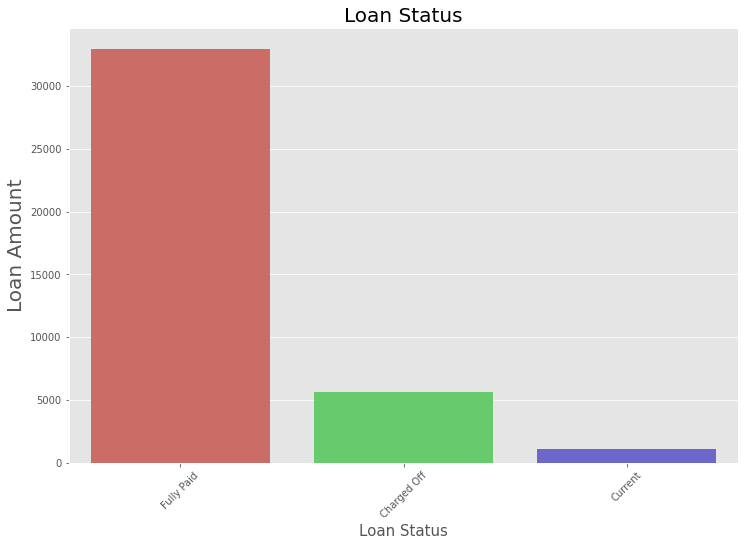

In [65]:
# Loan Status
plt.figure(figsize = (12,8))
g = sns.countplot(x="loan_status",data=df,
                  palette='hls')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Loan Status", fontsize=20)
g.set_xlabel("Loan Status", fontsize=15)
g.set_ylabel("Loan Amount", fontsize=20)

# Handle Missing Values

In [66]:
# Lets fill mode value in place of the missing value
df["emp_title"].value_counts(ascending=False).head()
df["emp_title"]= df["emp_title"].fillna(df["emp_title"].mode()[0])

In [67]:
# Lets fill mode value in place of the missing value
df["emp_length"].value_counts(ascending=False).head()
df["emp_length"]= df["emp_length"].fillna(df["emp_length"].mode()[0])

In [68]:
df["last_pymnt_d"]

0        Jan-15
1        Apr-13
2        Jun-14
3        Jan-15
4        May-16
          ...  
39712    Jul-10
39713    Jul-10
39714    Apr-08
39715    Jan-08
39716    Jun-10
Name: last_pymnt_d, Length: 39717, dtype: object

In [71]:
# Convert to date time
df["last_pymnt_d"]= pd.to_datetime(df["last_pymnt_d"],format='%b-%y')
df["last_pymnt_d"].value_counts(ascending=False).head()
# Lets fill mode value in place of the missing value
df["last_pymnt_d"]
df["last_pymnt_d"]= df["last_pymnt_d"].fillna(df["last_pymnt_d"].mode()[0])

In [76]:
# Let's fill the Median in place of the missing values
#https://www.geeksforgeeks.org/python-datetime-strptime-function/
df["revol_util"].value_counts(ascending=False).head()
df['revol_util'] = df['revol_util'].str.rstrip('%').astype('float') / 100.0
df["revol_util"]= df["revol_util"].fillna(df["revol_util"].median())

In [77]:
# Lets fill mode value in place of the missing value
df["purpose"].value_counts(ascending=False).head()
df["purpose"]= df["purpose"].fillna(df["purpose"].mode()[0])

In [78]:
# Lets fill mode value in place of the missing value
df["collections_12_mths_ex_med"].value_counts()
df["collections_12_mths_ex_med"]= df["collections_12_mths_ex_med"].fillna(df["collections_12_mths_ex_med"].mode()[0])

In [80]:
# Convert to date time
df["last_credit_pull_d"]= pd.to_datetime(df["last_credit_pull_d"],format='%b-%y')
df["last_credit_pull_d"].value_counts(ascending=False).head()

# Lets fill mode value in place of the missing value
df["last_credit_pull_d"]= df["last_credit_pull_d"].fillna(df["last_credit_pull_d"].mode()[0])

In [81]:
# Lets fill mode value in place of the missing value
df["acc_now_delinq"].value_counts(ascending=False)
df["acc_now_delinq"]= df["acc_now_delinq"].fillna(df["acc_now_delinq"].mode()[0])

In [82]:
# Let's fill the Median in place of the missing values
df["total_acc"].value_counts(ascending=False)
df["total_acc"]= df["total_acc"].fillna(df["total_acc"].median())

In [83]:
# Let's fill the Median in place of the missing values
df["open_acc"].value_counts(ascending=False)
df["open_acc"]= df["open_acc"].fillna(df["open_acc"].median())

In [85]:
# Convert to date time
df["earliest_cr_line"]= pd.to_datetime(df["earliest_cr_line"],format='%b-%y')
df["earliest_cr_line"].value_counts(ascending=False).head()

# Lets fill mode value in place of the missing value
df["earliest_cr_line"]= df["earliest_cr_line"].fillna(df["earliest_cr_line"].mode()[0])

In [86]:
# Lets fill mode value in place of the missing value
df["inq_last_6mths"].value_counts(ascending=False)
df["inq_last_6mths"]= df["inq_last_6mths"].fillna(df["inq_last_6mths"].mode()[0])

In [87]:
# Lets fill mode value in place of the missing value
df["pub_rec"].value_counts(ascending=False)
df["pub_rec"]= df["pub_rec"].fillna(df["pub_rec"].mode()[0])

In [88]:
# Lets fill mode value in place of the missing value
df["delinq_2yrs"].value_counts(ascending=False)
df["delinq_2yrs"]= df["delinq_2yrs"].fillna(df["delinq_2yrs"].mode()[0])

In [89]:
# Let's fill the Median in place of the missing values
df["annual_inc"].value_counts(ascending=False)
df["annual_inc"]= df["annual_inc"].fillna(df["annual_inc"].median())

In [90]:
# Extract only year from the variable
df["earliest_cr_line"] = pd.DatetimeIndex(df["earliest_cr_line"]).month
df["last_pymnt_d"] = pd.DatetimeIndex(df["last_pymnt_d"]).month
df["last_credit_pull_d"] = pd.DatetimeIndex(df["last_credit_pull_d"]).month

# Target Variables

In [91]:
df["loan_status"].value_counts()


Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [92]:
# Create a target variable "Loan Status" with two categories Good and Bad Loan
df["Loan_Class"] = np.where((df.loan_status == 'Current') |
                        (df.loan_status == 'Fully Paid') |
                        (df.loan_status== "Issued") |
                        (df.loan_status == 'Does not meet the credit policy. Status:Fully Paid'), 1, 0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Loan Amount')

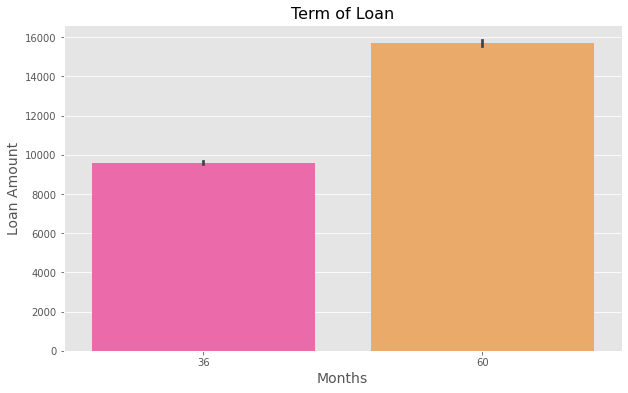

In [93]:
# Bar plot of Term (Loan taken for number of months)
plt.figure(figsize=(10,6))
sns.barplot("term", "loan_amnt", data=df, palette='spring')
plt.title("Term of Loan", fontsize=16)
plt.xlabel("Months", fontsize=14)
plt.ylabel("Loan Amount", fontsize=14)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Frequency Distribuition- Loan Amount')

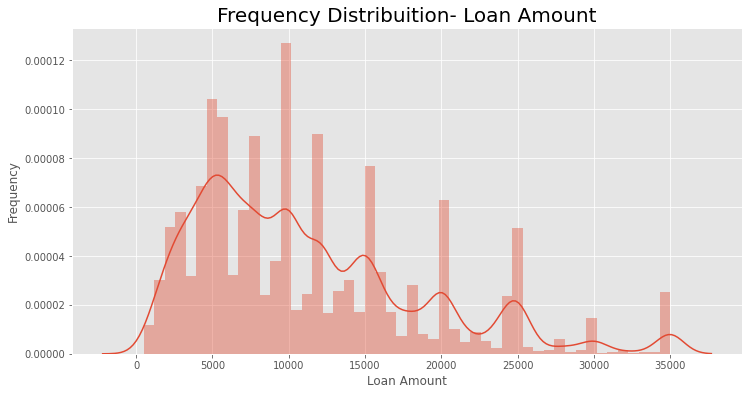

In [94]:
# Frequency distribution of Loan Amount
plt.figure(figsize=(12,6))
g = sns.distplot(df["loan_amnt"])
g.set_xlabel("Loan Amount", fontsize=12)
g.set_ylabel("Frequency", fontsize=12)
g.set_title("Frequency Distribuition- Loan Amount", fontsize=20)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Int Rate Distribuition')

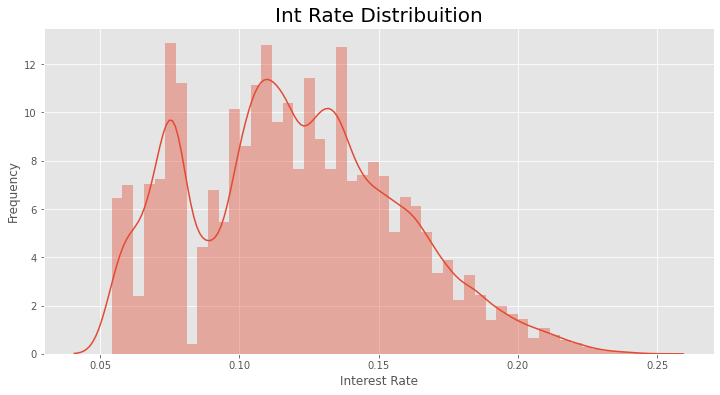

In [96]:
# Frequency distribution of Interest Rate
plt.figure(figsize=(12,6))
df['int_rate'] = df['int_rate'].str.rstrip('%').astype('float') / 100.0
g = sns.distplot(df["int_rate"])
g.set_xlabel("Interest Rate", fontsize=12)
g.set_ylabel("Frequency", fontsize=12)
g.set_title("Int Rate Distribuition", fontsize=20)

Text(0, 0.5, 'Loan Amount')

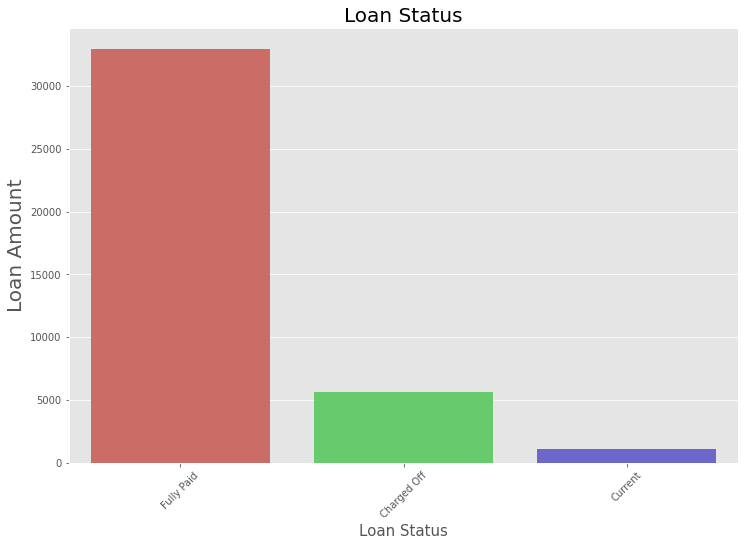

In [97]:
# Loan Status vs Loan Amount
plt.figure(figsize = (12,8))
g = sns.countplot(x="loan_status",data=df,
                  palette='hls')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Loan Status", fontsize=20)
g.set_xlabel("Loan Status", fontsize=15)
g.set_ylabel("Loan Amount", fontsize=20)

Text(0, 0.5, 'Loan Amount')

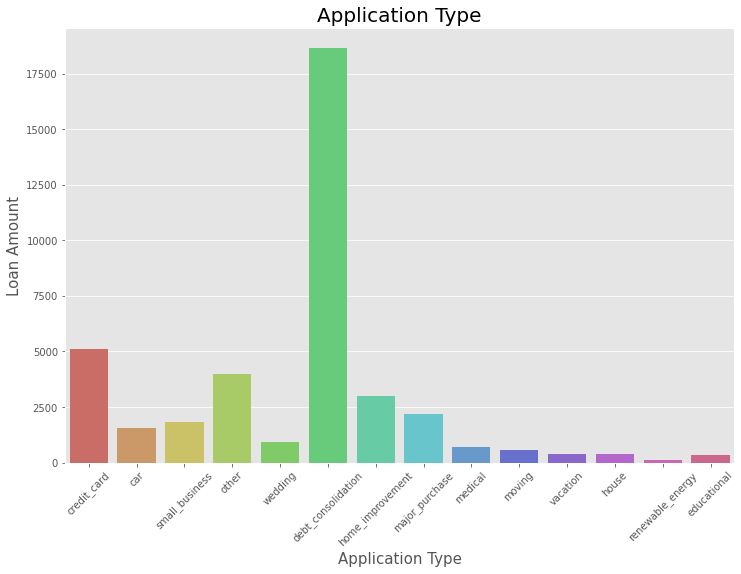

In [98]:
# Application Type and Loan Amount
plt.figure(figsize = (12,8))
g = sns.countplot(x="purpose",data=df,
                  palette='hls')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Application Type", fontsize=20)
g.set_xlabel("Application Type", fontsize=15)
g.set_ylabel("Loan Amount", fontsize=15)

<function matplotlib.pyplot.show>

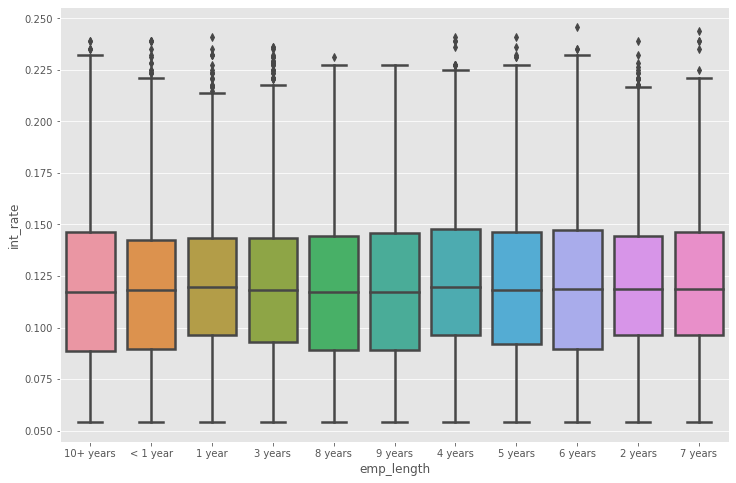

In [99]:
# Boxplot of Employment Length and Inter
plt.figure(figsize = (12,8))
ax = sns.boxplot(x="emp_length" ,y= "int_rate", data=df, linewidth=2.5)

plt.show

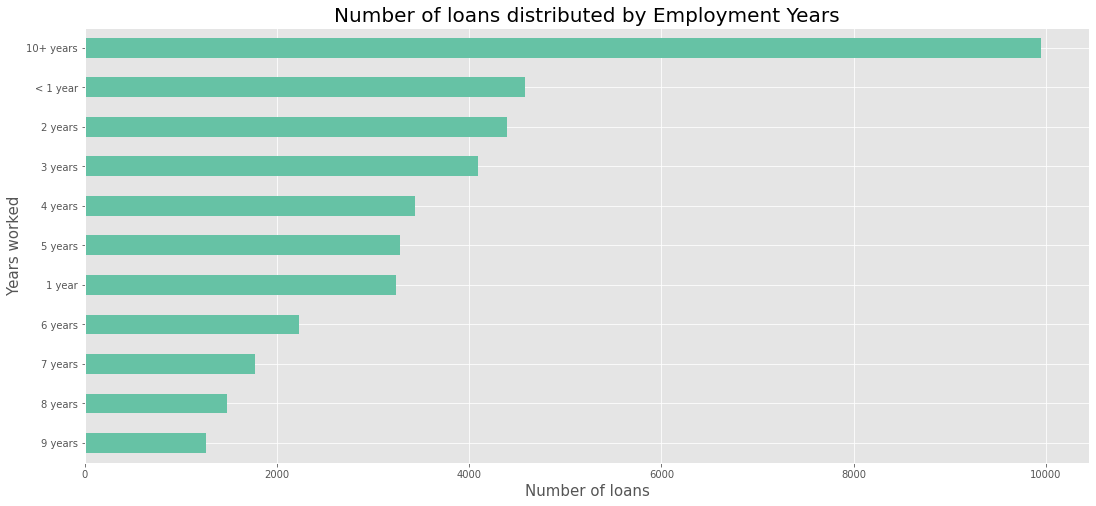

In [105]:
# Employment Length and Number of Loans
df['emp_length'].value_counts().sort_values().plot(kind='barh',colormap='Set2',figsize=(18,8))
plt.title('Number of loans distributed by Employment Years',fontsize=20)
plt.xlabel('Number of loans',fontsize=15)
plt.ylabel('Years worked',fontsize=15);

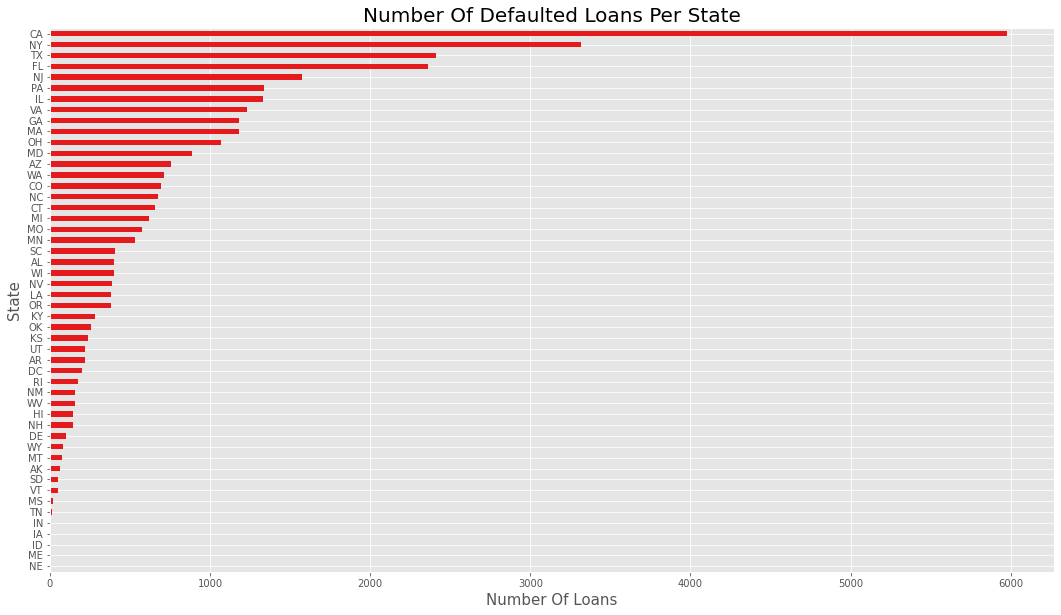

In [107]:
# No of Defaulted Loans per State
fig = plt.figure(figsize=(18,10))
df[df['Loan_Class']==1].groupby('addr_state')['Loan_Class'].count().sort_values().plot(kind='barh',colormap='Set1')
plt.ylabel('State',fontsize=15)
plt.xlabel('Number Of Loans',fontsize=15)
plt.title('Number Of Defaulted Loans Per State',fontsize=20);

Loan Amount Distribution BoxPlot


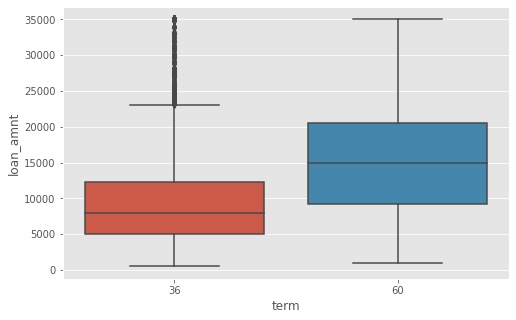

In [108]:
# Boxplot of Term and Loan Amount
print("Loan Amount Distribution BoxPlot")
plt.figure(figsize=(8,5))
sns.boxplot(x=df.term, y=df.loan_amnt)

Text(0, 0.5, 'Loan Amount')

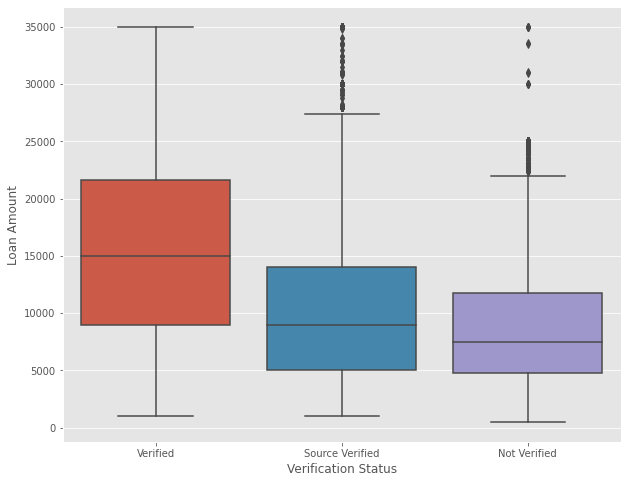

In [109]:
# Boxplot of Verification Status and Loan Amount
plt.figure(figsize=(10,8))
sns.boxplot(x=df.verification_status, y=df.loan_amnt)
plt.xlabel("Verification Status")
plt.ylabel("Loan Amount")

In [110]:
# Crosstabulation of Purpose and Loan Status
purp_loan= ['purpose', 'loan_status']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df[purp_loan[0]], df[purp_loan[1]]).style.background_gradient(cmap = cm)

loan_status,Charged Off,Current,Fully Paid
purpose,,,
car,160,50,1339
credit_card,542,103,4485
debt_consolidation,2767,586,15288
educational,56,0,269
home_improvement,347,101,2528
house,59,14,308
major_purchase,222,37,1928
medical,106,12,575
moving,92,7,484


# Correlation Matrix

In [111]:
# Convert into One Hot Encoding
# categorical_features.columns

cols= ['sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'addr_state',
       'initial_list_status', 'application_type']

for i in cols:
    lbl= LabelEncoder()
    lbl.fit(list(df[i].values))
    df[i]= lbl.transform(list(df[i].values))

In [112]:
# Check correlation between Loan_Class and all other independent variables
correlation_m = df.corr()
correlation_m["Loan_Class"].sort_values(ascending=False)

Loan_Class                        1.000000
loan_status                       0.971748
total_rec_prncp                   0.335019
total_pymnt                       0.238844
total_pymnt_inv                   0.236232
last_pymnt_amnt                   0.214949
out_prncp                         0.055476
out_prncp_inv                     0.055417
annual_inc                        0.041662
addr_state                        0.024128
total_acc                         0.023563
earliest_cr_line                  0.017946
total_rec_int                     0.010780
open_acc                          0.010742
emp_length                        0.010725
revol_bal                        -0.003369
last_credit_pull_d               -0.005096
issue_d                          -0.013858
delinq_2yrs                      -0.019904
installment                      -0.022589
last_pymnt_d                     -0.022755
home_ownership                   -0.025494
funded_amnt_inv                  -0.026621
emp_title  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Frequency')

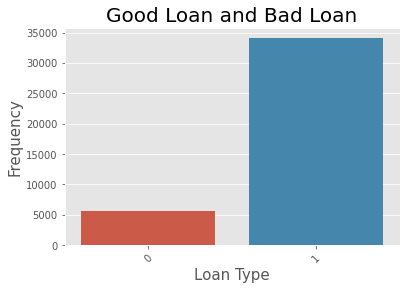

In [113]:
# Countplot of Good Loans and Bad Loans
g= sns.countplot(df["Loan_Class"])
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Good Loan and Bad Loan", fontsize=20)
g.set_xlabel("Loan Type", fontsize=15)
g.set_ylabel("Frequency", fontsize=15)